### Resultat för kurser (YH-utbildningar upp till 99 poäng)

In [62]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df_2022 = pd.read_excel("data/resultat-2022-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")
df_2023 = pd.read_excel("data/resultat-2023-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")
df_2024 = pd.read_excel("data/resultat-2024-for-kurser-inom-yh.xlsx", sheet_name="Lista ansökningar")

df_2022.head()
df_2023.head()
df_2024.head()

,Diarienummer,Beslut,Anordnare namn,Utbildningsnamn,Utbildningsområde,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Avslag,Changemaker Educations AB,Futuregames Accessible Game Production,Juridik,0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Avslag,Changemaker Educations AB,Futuregames Inclusive Game Development,"Ekonomi, administration och försäljning",0,0,0,0,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Avslag,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Avslag,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Avslag,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",0,0,0,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [63]:
print("Dataframe shape:", 
      df_2022.shape, 
      df_2023.shape, 
      df_2024.shape
      )

Dataframe shape: (482, 15) (280, 15) (880, 16)


In [64]:
print(df_2024.columns)


Index(['Diarienummer', 'Beslut', 'Anordnare namn', 'Utbildningsnamn',
       'Utbildningsområde', 'Antal beviljade platser start 2024',
       'Antal beviljade platser start och slut 2024',
       'Antal beviljade platser start 2025', 'Totalt antal beviljade platser',
       'YH-poäng', 'Kommun', 'Län', 'FA-region', 'Antal kommuner', 'Antal län',
       'Antal FA-regioner'],
      dtype='object')


In [65]:
df_2024.describe()

,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025,Totalt antal beviljade platser,YH-poäng,Antal kommuner,Antal län,Antal FA-regioner
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,9.462500,8.592045,9.171591,27.226136,41.563636,1.365909,1.343182,1.343182
std,17.835768,16.118678,17.092104,33.113759,19.014169,0.896319,0.862807,0.870682
min,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,16.500000,40.000000,1.000000,1.000000,1.000000
75%,2.500000,4.750000,2.500000,48.500000,50.000000,1.000000,1.000000,1.000000
max,100.000000,80.000000,80.000000,160.000000,99.000000,5.000000,5.000000,5.000000


In [66]:
df_inkomna_ansökningar = pd.read_excel(
    "data/inkomna-ansokningar-2024-for-kurser.xlsx",
)

df_inkomna_ansökningar.head()

,Diarienummer,Anordnare namn,Utbildningsnamn,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,YH-poäng,Kommun,Län,FA-region,Antal kommuner,Antal län,Antal FA-regioner
0,MYH 2024/1000,Changemaker Educations AB,Futuregames Accessible Game Production,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
1,MYH 2024/1001,Changemaker Educations AB,Futuregames Inclusive Game Development,Data/IT,35,0,35,25,"Se ""Lista flera kommuner""","Se ""Lista flera kommuner""","Se ""Lista flera kommuner""",3,3,3
2,MYH 2024/1002,Båstads kommun Akademi Båstad,Ekosystemtjänster i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
3,MYH 2024/1003,Båstads kommun Akademi Båstad,Hållbar dagvattenhantering i praktiken,"Lantbruk, djurvård, trädgård, skog och fiske",25,0,0,50,Båstad,Skåne,Malmö-Lund,1,1,1
4,MYH 2024/1004,Båstads kommun Akademi Båstad,Invasiva växter i utemiljöer,"Lantbruk, djurvård, trädgård, skog och fiske",40,40,0,25,Båstad,Skåne,Malmö-Lund,1,1,1


In [67]:
beviljade = (
    df.groupby("Utbildningsområde")[[
        "Totalt antal beviljade platser",
        "Antal beviljade platser start 2024",
        "Antal beviljade platser start och slut 2024",
        "Antal beviljade platser start 2025",
    ]]
    .sum()
    .reset_index()
    .sort_values(by= "Utbildningsområde", ascending= True)
)

beviljade.index.name = "id"
beviljade.reset_index(inplace=True)
beviljade

,id,Utbildningsområde,Totalt antal beviljade platser,Antal beviljade platser start 2024,Antal beviljade platser start och slut 2024,Antal beviljade platser start 2025
0,0,Data/IT,4159,1459,1276,1424
1,1,"Ekonomi, administration och försäljning",7148,2822,1714,2612
2,2,Friskvård och kroppsvård,0,0,0,0
3,3,"Hotell, restaurang och turism",586,132,322,132
4,4,Hälso- och sjukvård samt socialt arbete,3155,1140,940,1075
5,5,Journalistik och information,482,75,332,75
6,6,Juridik,518,130,258,130
7,7,"Kultur, media och design",300,20,260,20
8,8,"Lantbruk, djurvård, trädgård, skog och fiske",467,119,185,163
9,9,Pedagogik och undervisning,518,115,288,115


In [68]:
df_inkomna_ansökningar.shape

(881, 14)

In [69]:
ansökta_platser_utbildningsområde = (
    df_inkomna_ansökningar.groupby("Sökt utbildningsområde")[
        [
            "Sökt antal platser 2024",
            "Sökt antal platser 2024 (start och avslut 2024)",
            "Sökt antal platser 2025",
        ]
    ]
    .sum()
    .reset_index()
    .sort_values(by="Sökt utbildningsområde", ascending=True)
)

ansökta_platser_utbildningsområde["Total ansökta platser"] = (
    ansökta_platser_utbildningsområde[
        [
            "Sökt antal platser 2024",
            "Sökt antal platser 2024 (start och avslut 2024)",
            "Sökt antal platser 2025",
        ]
    ].sum(axis=1)
)

ansökta_platser_utbildningsområde.index.name = "id"

ansökta_platser_utbildningsområde = ansökta_platser_utbildningsområde.reset_index()
ansökta_platser_utbildningsområde

,id,Sökt utbildningsområde,Sökt antal platser 2024,Sökt antal platser 2024 (start och avslut 2024),Sökt antal platser 2025,Total ansökta platser
0,0,Data/IT,6631,4189,7638,18458
1,1,"Ekonomi, administration och försäljning",5861,3891,6564,16316
2,2,Friskvård och kroppsvård,146,0,196,342
3,3,"Hotell, restaurang och turism",937,707,1012,2656
4,4,Hälso- och sjukvård samt socialt arbete,4261,2525,5206,11992
5,5,Journalistik och information,350,295,375,1020
6,6,Juridik,273,278,293,844
7,7,"Kultur, media och design",1055,915,1190,3160
8,8,"Lantbruk, djurvård, trädgård, skog och fiske",693,465,717,1875
9,9,Pedagogik och undervisning,523,408,728,1659


In [70]:
df.describe

<bound method NDFrame.describe of       Diarienummer    Beslut                       Anordnare namn  \
0    MYH 2024/1000    Avslag            Changemaker Educations AB   
1    MYH 2024/1001    Avslag            Changemaker Educations AB   
2    MYH 2024/1002    Avslag        Båstads kommun Akademi Båstad   
3    MYH 2024/1003    Avslag        Båstads kommun Akademi Båstad   
4    MYH 2024/1004    Avslag        Båstads kommun Akademi Båstad   
..             ...       ...                                  ...   
875   MYH 2024/995  Beviljad  Hyper Island Program AB - Stockholm   
876   MYH 2024/996    Avslag                              INSU AB   
877   MYH 2024/997    Avslag                              INSU AB   
878   MYH 2024/998  Beviljad                      Campus Nyköping   
879   MYH 2024/999    Avslag            Changemaker Educations AB   

                                       Utbildningsnamn  \
0              Futuregames Accessible Game Production    
1               Futur

In [71]:
df["Kommun"].value_counts()

Kommun
Stockholm                    172
Se "Lista flera kommuner"    164
Göteborg                     103
Malmö                         65
Solna                         30
                            ... 
Jokkmokk                       1
Värnamo                        1
Färjestaden                    1
Järfälla                       1
Järna                          1
Name: count, Length: 91, dtype: int64

In [72]:
df["Utbildningsområde"].unique()

array(['Juridik', 'Ekonomi, administration och försäljning',
       'Lantbruk, djurvård, trädgård, skog och fiske',
       'Samhällsbyggnad och byggteknik', 'Data/IT',
       'Hälso- och sjukvård samt socialt arbete', 'Säkerhetstjänster',
       'Teknik och tillverkning', 'Journalistik och information',
       'Pedagogik och undervisning', 'Kultur, media och design',
       'Transporttjänster', 'Hotell, restaurang och turism',
       'Friskvård och kroppsvård'], dtype=object)

In [73]:
bevilade_avslag

NameError: name 'bevilade_avslag' is not defined

### Graph

In [37]:
ansökta_platser_utbildningsområde = ansökta_platser_utbildningsområde.drop("id", axis= 1).set_index("Sökt utbildningsområde")

/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_33942/244105776.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ansökta_platser_utbildningsområde.index, rotation=45, ha="right")
/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_33942/244105776.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


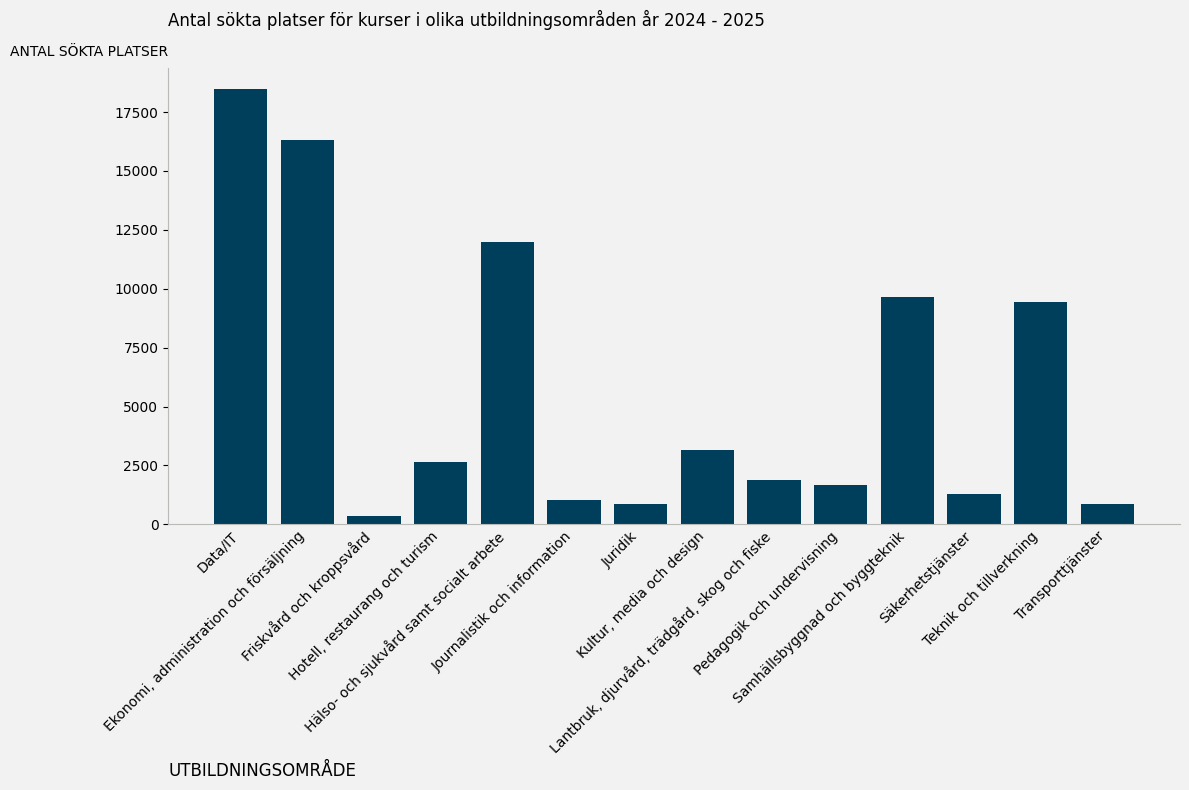

In [38]:
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(
    x=ansökta_platser_utbildningsområde.index,
    height=ansökta_platser_utbildningsområde["Total ansökta platser"],
    color="#003f5c" 
)

# Ljusgrå bakgrund
fig.patch.set_facecolor("#f2f2f2")  
ax.set_facecolor("#f2f2f2")         

# Remove clutter
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params(axis="x", which="both", length=0)

# Contrast
ax.spines[["left", "bottom"]].set_color("#b9bbb6")
ax.tick_params(axis="both")

# Description and label
ax.set_xticklabels(labels=ansökta_platser_utbildningsområde.index, rotation=45, ha="right")
ax.set_title("Antal sökta platser för kurser i olika utbildningsområden år 2024 - 2025", fontsize=12, loc="left", pad=30)
ax.set_ylabel("ANTAL SÖKTA PLATSER", loc="top", rotation=0)
ax.yaxis.set_label_coords(0, 1.02)
ax.set_xlabel("UTBILDNINGSOMRÅDE", loc="left", fontsize=12)

fig.tight_layout()
fig.show()


Text(0, 0, 'UTBILDNINGSOMRÅDE')

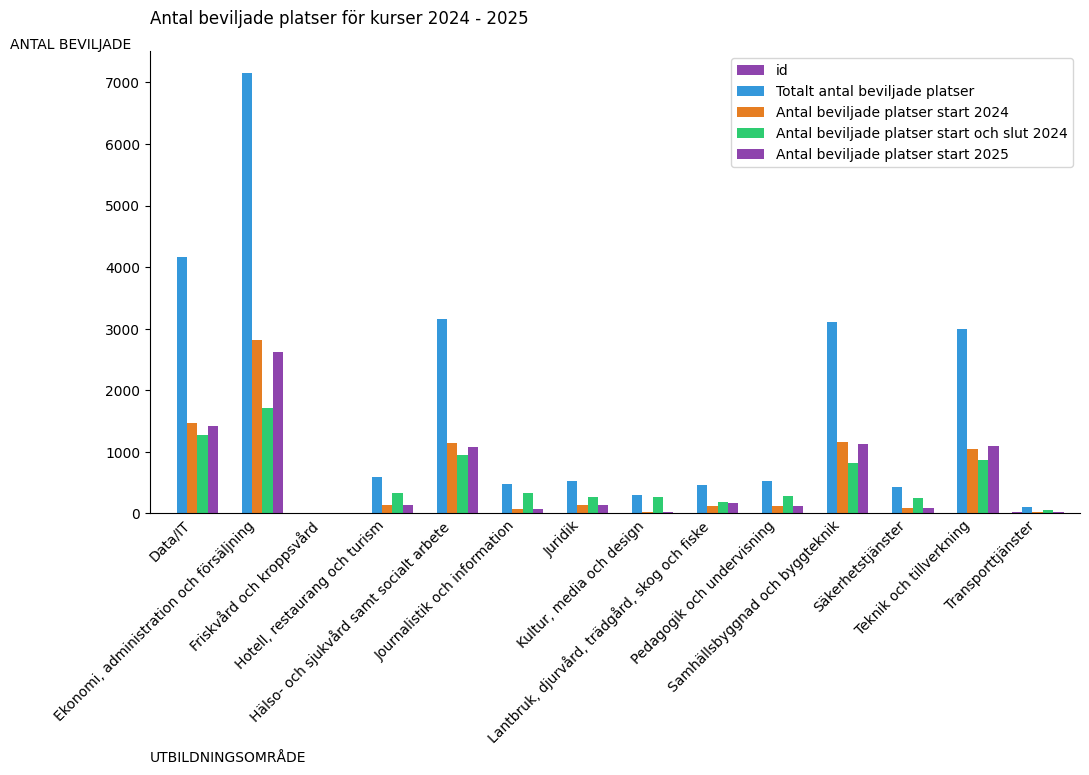

In [115]:
def beviljad_plot():
    colors = ['#8e44ad', '#3498db', '#e67e22', '#2ecc71']  
    ax = beviljade.plot(kind='bar', figsize=(12,6), width=0.8, color=colors)
    ax.set_xticklabels(beviljade.index, rotation=45, ha="right")

    fig = ax.get_figure()
    return fig, ax

fig, ax = beviljad_plot()

# Clutter
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params("x", length=0)

# Contrast
ax.set_title("Antal beviljade platser för kurser 2024 - 2025", loc="left", pad=20)
ax.set_ylabel("ANTAL BEVILJADE", loc="top", rotation=0)
ax.yaxis.set_label_coords(-0.02, 1)
ax.set_xlabel("UTBILDNINGSOMRÅDE", loc="left")


In [40]:
bevilade_avslag["antal_avslag"] = bevilade_avslag["Total ansökta platser"] - bevilade_avslag["Totalt antal beviljade platser"]

In [41]:
bevilade_avslag.drop("Total ansökta platser", axis=1, inplace=True)
bevilade_avslag

,Sökt utbildningsområde,Totalt antal beviljade platser,antal_avslag
0,Data/IT,4159,14299
1,"Ekonomi, administration och försäljning",7148,9168
2,Friskvård och kroppsvård,0,342
3,"Hotell, restaurang och turism",586,2070
4,Hälso- och sjukvård samt socialt arbete,3155,8837
5,Journalistik och information,482,538
6,Juridik,518,326
7,"Kultur, media och design",300,2860
8,"Lantbruk, djurvård, trädgård, skog och fiske",467,1408
9,Pedagogik och undervisning,518,1141


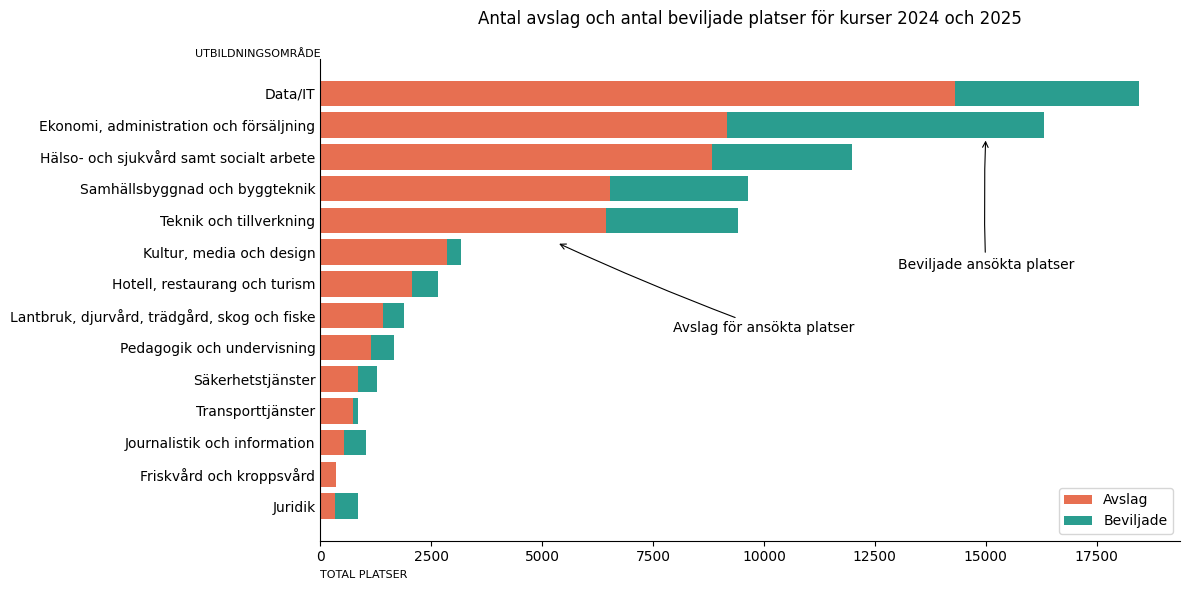

In [134]:
import numpy as np
import matplotlib.pyplot as plt


bevilade_avslag.sort_values(by="antal_avslag", inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))


length = np.arange(len(bevilade_avslag["Sökt utbildningsområde"]))


färg_avslag = "#e76f51"        
färg_beviljad = "#2a9d8f"       


ax.barh(length, bevilade_avslag["antal_avslag"], label="Avslag", color=färg_avslag)
ax.barh(
    length,
    bevilade_avslag["Totalt antal beviljade platser"],
    left=bevilade_avslag["antal_avslag"],
    label="Beviljade",
    color=färg_beviljad
)


ax.legend()
ax.tick_params("y", length=0)
ax.spines[["top", "right"]].set_visible(False)
ax.set_yticks(length)
ax.set_yticklabels(bevilade_avslag["Sökt utbildningsområde"])
ax.set_title("Antal avslag och antal beviljade platser för kurser 2024 och 2025", pad=25)
ax.set_ylabel("UTBILDNINGSOMRÅDE", loc="top", rotation=0, fontsize=8)
ax.yaxis.set_label_coords(0, 1)
ax.set_xlabel("TOTAL PLATSER", loc="left", fontsize=8)


if len(ax.patches) > 3:
    rect1 = ax.patches[0] 
    rect2 = ax.patches[2] 

    ax.annotate(
        "Avslag för ansökta platser",
        xy=(rect1.get_width() + 5000, rect1.get_y() + 8.7),
        ha="center",
        va="center",
        arrowprops=dict(arrowstyle="->", linewidth=0.8, connectionstyle="arc3, rad=-.02"),
        xytext=(rect1.get_height() + 10000, rect1.get_y() + 6)
    )

    ax.annotate(
        "Beviljade ansökta platser",
        xy=(rect2.get_height() + 15000, rect2.get_y() + 10.0),
        ha="center",
        va="center",
        arrowprops=dict(arrowstyle="->", linewidth=0.8, connectionstyle="arc3, rad=-.02"),
        xytext=(rect2.get_height() + 15000, rect2.get_y() + 6)
    )

fig.tight_layout()
plt.show()


### Antal beviljade kurser per skola 



In [8]:
import pandas as pd
import duckdb

excel_path = "Data/resultat-2024-for-kurser-inom-yh.xlsx"
df = pd.read_excel(excel_path, sheet_name="Lista ansökningar")


approval_per_school = duckdb.query("""
SELECT
    "Anordnare namn" AS "Anordnare",
    COUNT(*) AS "Ansökta kurser",
    COUNT(*) FILTER (WHERE Beslut = 'Beviljad') AS "Antal beviljade",
    ROUND(
        COUNT(*) FILTER (WHERE Beslut = 'Beviljad') * 100.0 / COUNT(*),
        1
    ) AS "Beviljandegrad %"
FROM df
GROUP BY "Anordnare namn"
ORDER BY "Antal beviljade" DESC
""").df().set_index("Anordnare")

approval_per_school

,Ansökta kurser,Antal beviljade,Beviljandegrad %
Anordnare,,,
YH Akademin AB,45,35,77.8
IHM Business School AB Göteborg,30,27,90.0
Medieinstitutet i Sverige AB,23,19,82.6
Nackademin AB,18,18,100.0
"Göteborgs Stad, Yrgo",24,14,58.3
...,...,...,...
Falkenbergs kommun,1,0,0.0
WeWon Media Group AB,5,0,0.0
Solarspect Sverige ab,2,0,0.0


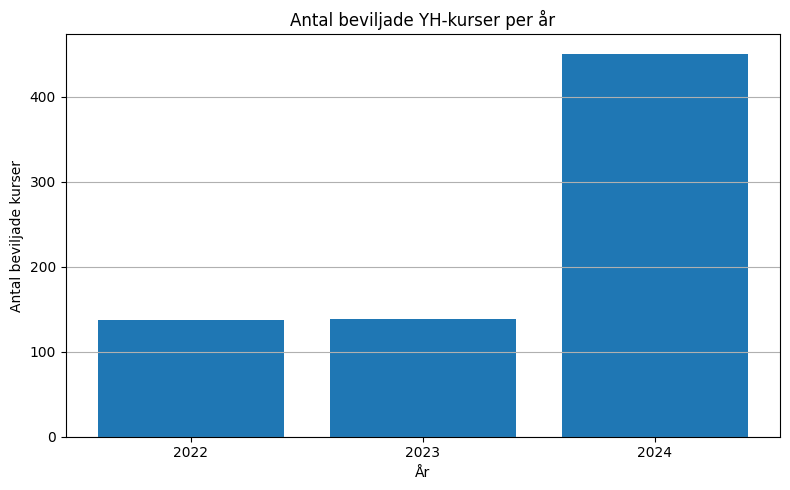


Antal beviljade kurser per utbildningsområde och år:

År                                            2022  2023  2024
Utbildningsområde                                             
Data/IT                                         16    18    73
Ekonomi, administration och försäljning         37    32   109
Hotell, restaurang och turism                    4     5    15
Hälso- och sjukvård samt socialt arbete         16    16    56
Journalistik och information                     3     2     9
Juridik                                          0     1     9
Kultur, media och design                         3     1     9
Lantbruk, djurvård, trädgård, skog och fiske     8     6    14
Pedagogik och undervisning                       3     3    12
Samhällsbyggnad och byggteknik                  24    27    64
Säkerhetstjänster                                3     2     8
Teknik och tillverkning                         20    26    70
Transporttjänster                                0     0     3


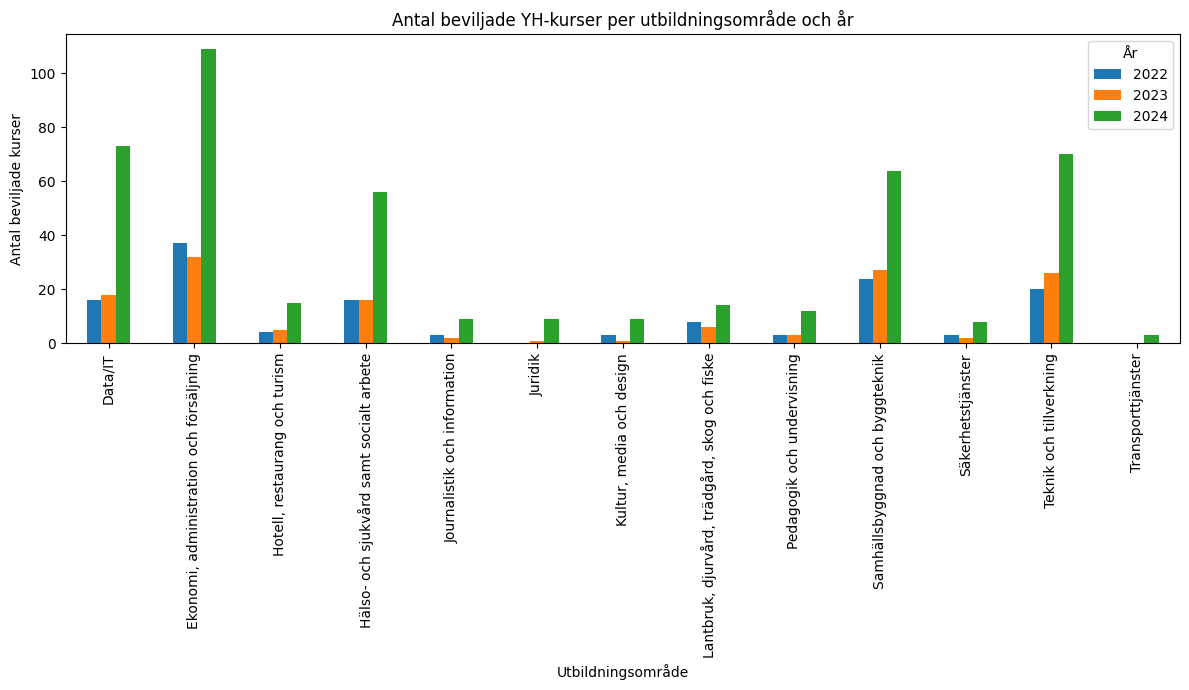

In [16]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Filvägar (anpassade till rätt namn)
file_paths = [
    "data/resultat-2022-for-kurser-inom-yh.xlsx",
    "data/resultat-2023-for-kurser-inom-yh.xlsx",
    "data/resultat-2024-for-kurser-inom-yh.xlsx"
]

years = [2022, 2023, 2024]
dfs = []

# Läs och märk med år
for fp, year in zip(file_paths, years):
    df = pd.read_excel(fp)
    df["År"] = year
    dfs.append(df)

# Kombinera och filtrera
combined_df = pd.concat(dfs, ignore_index=True)
approved_df = combined_df[combined_df["Beslut"].str.lower() == "beviljad"]

# ====== Diagram 1: Totalt per år ======
approved_per_year = approved_df["År"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(approved_per_year.index.astype(str), approved_per_year.values)
plt.title("Antal beviljade YH-kurser per år")
plt.xlabel("År")
plt.ylabel("Antal beviljade kurser")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ====== Tabell + Diagram 2: Per utbildningsområde och år ======
area_year_counts = approved_df.groupby(["År", "Utbildningsområde"]).size().unstack(fill_value=0)
print("\nAntal beviljade kurser per utbildningsområde och år:\n")
print(area_year_counts.T)

# Diagram
area_year_counts.T.plot(kind="bar", figsize=(12, 7))
plt.title("Antal beviljade YH-kurser per utbildningsområde och år")
plt.xlabel("Utbildningsområde")
plt.ylabel("Antal beviljade kurser")
plt.xticks(rotation=90)
plt.legend(title="År")
plt.tight_layout()
plt.show()


<>:82: SyntaxWarning: invalid escape sequence '\m'
<>:82: SyntaxWarning: invalid escape sequence '\m'
/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_80813/1668619549.py:82: SyntaxWarning: invalid escape sequence '\m'
  + "\n$\mathbf{37,3\%}$",
/var/folders/vq/_15cqrtj511_npmbzb5r8pzw0000gn/T/ipykernel_80813/1668619549.py:82: SyntaxWarning: invalid escape sequence '\m'
  + "\n$\mathbf{37,3\%}$",


TypeError: Axes.text() missing 1 required positional argument: 's'

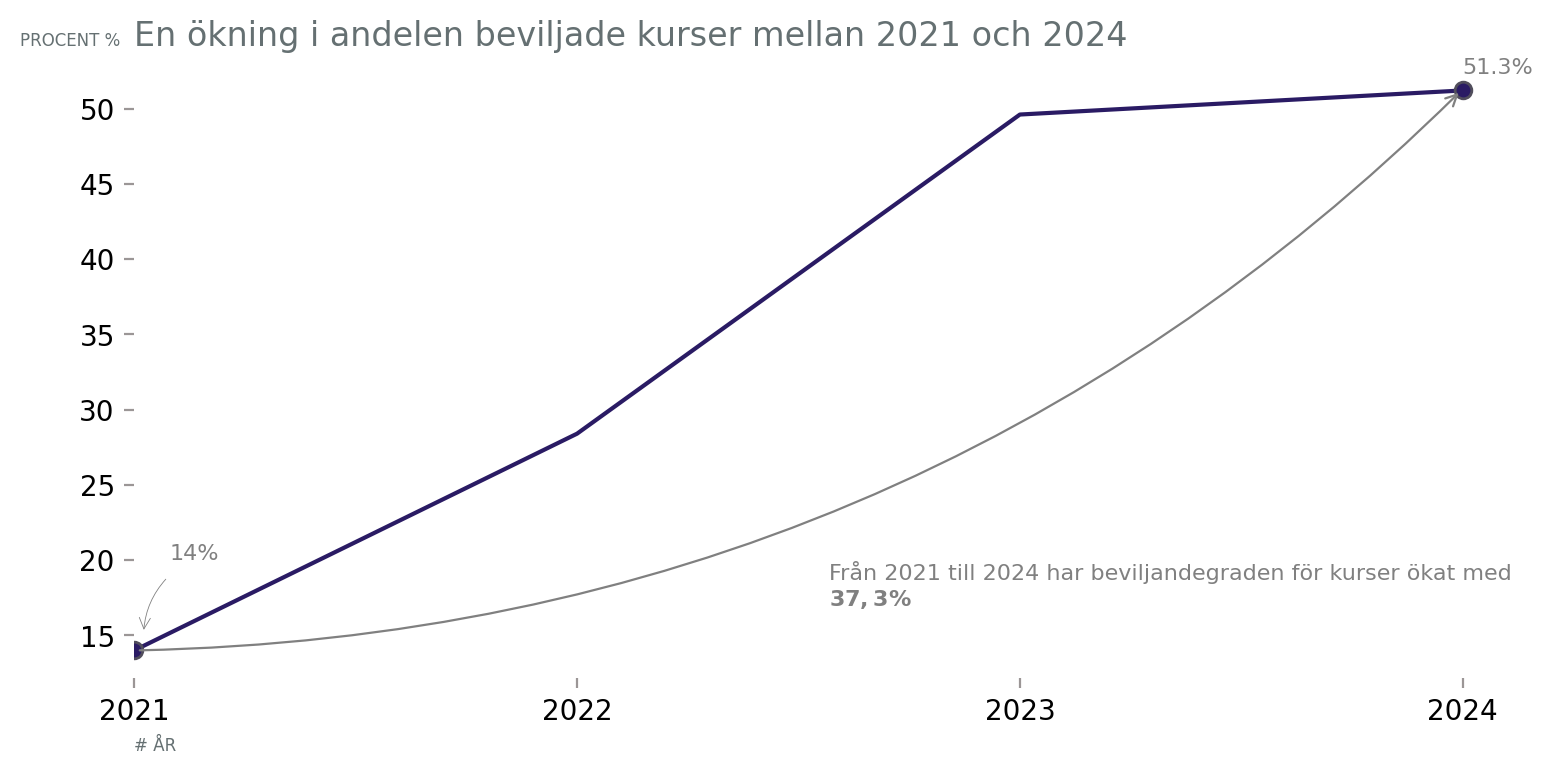

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Filvägar
file_paths = [
    "data/resultat-2022-for-kurser-inom-yh.xlsx",
    "data/resultat-2023-for-kurser-inom-yh.xlsx",
    "data/resultat-2024-for-kurser-inom-yh.xlsx"
]
years = [2022, 2023, 2024]
dfs = []

# Läs in filer och märk med år
for fp, year in zip(file_paths, years):
    df = pd.read_excel(fp)
    df["År"] = year
    dfs.append(df)

# Kombinera
combined_df = pd.concat(dfs, ignore_index=True)

# Grupp per år
total_per_year = combined_df.groupby("År").size()
approved_per_year = combined_df[combined_df["Beslut"].str.lower() == "beviljad"].groupby("År").size()

# Räkna procent
df_line_chart = pd.DataFrame({
    "Kurser": (approved_per_year / total_per_year * 100).round(1)
})

# Lägg till 2021 för kontext (fiktiv bas)
df_line_chart.loc[2021] = 14.0
df_line_chart = df_line_chart.sort_index()

# ===== Diagrammet (enbart Kurser) =====
fig, ax = plt.subplots(figsize=(9, 4), dpi=200)

ax.plot(
    df_line_chart.index,
    df_line_chart["Kurser"],
    marker="o",
    color="#2A1B64",
    label="Kurser",
    markeredgecolor="#514E5C",
    markevery=[0, -1],
)


for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xticks(df_line_chart.index)
ax.set_xlim(df_line_chart.index.min())
ax.tick_params("both", color="#9B9696")
ax.set_xlabel("# ÅR", loc="left", fontsize=6, color="#657072")
ax.set_ylabel("PROCENT %", loc="top", rotation=0, fontsize=6, color="#657072")
ax.yaxis.set_label_coords(-0.01, 1.02)
ax.set_title(
    "En ökning i andelen beviljade kurser mellan 2021 och 2024",
    loc="left", color="#657072"
)

# Funktion för textetiketter
def text_annotation(ax, **option):
    ax.text(
        x=option.get("x_value", 2022),
        y=option.get("y_value", 30),
        s=option.get("text", ""),
        fontsize=option.get("font", 8),
        color=option.get("color", "grey")
    )

# Textetiketter
text_annotation(ax, x_value=2024, y_value=52.3, text="51.3%", font=8)
text_annotation(ax, x_value=2021 + 0.08, y_value=20, text="14%", font=8)

text_annotation(
    ax,
    x_value=2023 - 0.43,
    y_value=17,
    text="Från 2021 till 2024 har beviljandegraden för kurser ökat med" 
    + "\n$\mathbf{37,3\%}$",
    font=8,
)

# Pilar (inklusive ny pil från 2021 till 2024)
def arrow_annotation(ax, **option):
    ax.annotate(
        text="",
        xy=(option.get("x_value") + option.get("x_distans", 0), option.get("y_value_piont")),
        xytext=(option.get("x_value") + option.get("x_distans_start", 0), option.get("y_value_start")),
        arrowprops=dict(
            arrowstyle="->",
            linewidth=option.get("linewidth", 0.3),
            connectionstyle=f"arc3, rad={option.get('rad', 0.3)}",
            color=option.get("color", "grey")
        ),
    )

# Ursprungliga pilar
# arrow_annotation(ax, x_value=2021, y_value_piont=33, x_distans=0.02, y_value_start=36.8, x_distans_start=0.08, linewidth=0.3, rad=0.2)
arrow_annotation(ax, x_value=2021, y_value_piont=15, x_distans=0.021, y_value_start=19, x_distans_start=0.08, linewidth=0.3, rad=0.2)

# ➤ Ny pil från 2021 (14%) till 2024 (51.2%)
ax.annotate(
    "",
    xy=(2024, 51.3),
    xytext=(2021, 14),
    arrowprops=dict(
        arrowstyle="->",
        linewidth=0.8,
        color="grey",
        connectionstyle="arc3,rad=0.2"
    )
)

# Text bredvid pilen
ax.text(
    2021.6, 32,
    fontsize=8,
    color="grey"
)

fig.tight_layout()
fig.show()
fig.savefig("../beviljandegrad.png")


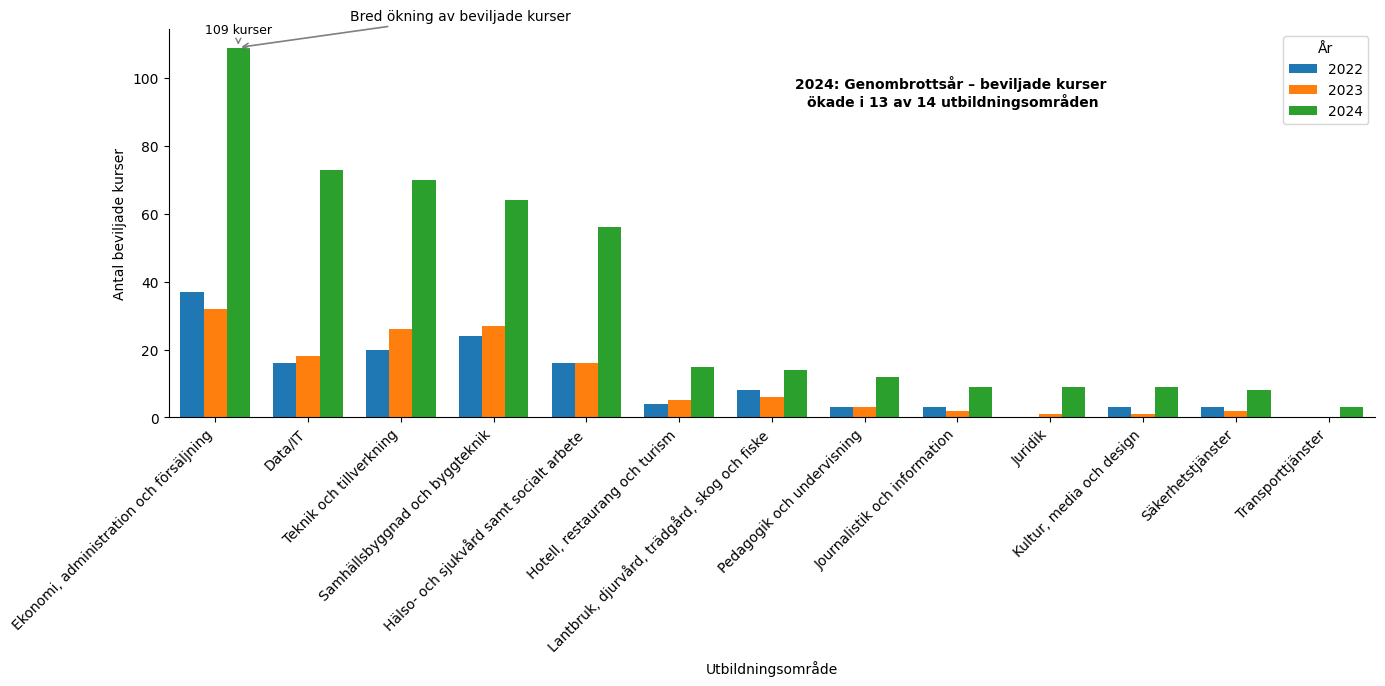

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Läs in filerna ===
df_2022 = pd.read_excel("data/resultat-2022-for-kurser-inom-yh.xlsx")
df_2023 = pd.read_excel("data/resultat-2023-for-kurser-inom-yh.xlsx")
df_2024 = pd.read_excel("data/resultat-2024-for-kurser-inom-yh.xlsx")

# === 2. Lägg till årskolumn ===
df_2022["År"] = 2022
df_2023["År"] = 2023
df_2024["År"] = 2024

# === 3. Slå ihop och filtrera beviljade ===
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
approved_all = df_all[df_all["Beslut"].str.lower() == "beviljad"]

# === 4. Grupp & sortering ===
approved_grouped = approved_all.groupby(["Utbildningsområde", "År"]).size().unstack(fill_value=0)
area_order = approved_grouped[2024].sort_values(ascending=False).index
approved_grouped = approved_grouped.loc[area_order]

# === 5. Rita stapeldiagram ===
fig, ax = plt.subplots(figsize=(14, 7))
bar_width = 0.25
x = range(len(approved_grouped.index))
colors = {2022: "#1f77b4", 2023: "#ff7f0e", 2024: "#2ca02c"}

for i, year in enumerate([2022, 2023, 2024]):
    ax.bar(
        [p + i * bar_width for p in x],
        approved_grouped[year],
        width=bar_width,
        label=str(year),
        color=colors[year]
    )

# === 6. Annotationer på utvalda områden 2024 ===
highlight_labels = [
    # "Data/IT",
    "Ekonomi, administration och försäljning",
    # "Hälso- och sjukvård samt socialt arbete",
    # "Samhällsbyggnad och byggteknik",
    # "Teknik och tillverkning",
    # "Hotell, restaurang och turism",
    # "Transporttjänster",
    # "Journalistik och information",
    # "Juridik",
    # "Kultur, media och design",
    # "Lantbruk, djurvård, trädgård, skog och fiske",
    # "Pedagogik och undervisning",
    # "Säkerhetstjänster"
]
for i, label in enumerate(approved_grouped.index):
    if label in highlight_labels:
        value = approved_grouped.loc[label, 2024]
        ax.annotate(
            f"{value} kurser",
            xy=(x[i] + 2 * bar_width, value),
            xytext=(0, 8),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=9,
            # fontweight="bold",
            arrowprops=dict(arrowstyle="->", color="gray")
        )

# === 7. Övergripande text ===
ax.annotate("2024: Genombrottsår – beviljade kurser " \
"\nökade i 13 av 14 utbildningsområden",
    # "2024 blev ett genombrottsår för YH – bredden av " \
    # "\nutbildningsområden som fick beviljade kurser ökade kraftigt, " \
    # "\nmed ökning i 13 av 14 utbildningsområden",
    xy=(0.65, 0.8),
    xycoords="axes fraction",
    ha="center",
    fontsize=10,
    fontweight="bold",
    color="black"
)

# === 8. Pil + etikett för generell trend ===
# ax.annotate(
#     "Bred tillväxt i beviljade kurser",
#     xy=(1, approved_grouped.iloc[0, 2]),
#     xytext=(1, approved_grouped.iloc[0, 2] + 11),
#     textcoords="data",
#     ha="left",
#     arrowprops=dict(arrowstyle="->", color="gray"),
#     fontsize=10,
#     color="black"
# )
# === 8. Pil + etikett för generell trend (riktad mot Ekonomi-stapeln 2024) ===
i = 0  # första stapeln i diagrammet
target_value = approved_grouped.iloc[i, 2]  # värde för 2024
bar_x_pos = i + 2 * bar_width  # x-position för 2024-stapeln

ax.annotate(
    "Bred ökning av beviljade kurser",
    xy=(bar_x_pos, target_value),                      # spetsen av pilen
    xytext=(bar_x_pos + 1.2, target_value + 8),        # kort distans ovanför stapeln
    textcoords="data",
    ha="left",
    fontsize=10,
    color="black",
    arrowprops=dict(arrowstyle="->", color="gray", lw=1.2)
)


# === 9. Format & layout ===
ax.set_xticks([p + bar_width for p in x])
ax.set_xticklabels(approved_grouped.index, rotation=45, ha="right")
# ax.set_title("Antal beviljade kurser per utbildningsområde och år (2022–2024)", pad=50)
ax.set_ylabel("Antal beviljade kurser")
ax.set_xlabel("Utbildningsområde")
ax.legend(title="År")

ax.spines["top"].set_visible(False)     # ta bort toppen
ax.spines["right"].set_visible(False)   # ta bort högersidan
ax.margins(x=0.01)


fig.tight_layout()
plt.show()

fig.savefig("../public/beviljade_kurser_per_utbildningsområde.png", dpi=300, bbox_inches="tight")

